## Modelling

### Importing Libraries

In [1283]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1285]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import joblib
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import plotly.express as px

### Importing Data

In [1287]:
df = pd.read_csv('../assets/cleaned_data.csv')

In [1289]:
df.head()

,Scaledage,Scaledincome,Scaledspending_score,Scaledpurchase_frequency,Scaledlast_purchase_amount,Scaledmembership_years,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,-0.384644,0.316868,1.358468,-0.182348,-1.281540,-0.865010,False,False,False,True,False,False
1,-1.515362,-0.282016,0.321865,1.082005,-1.523763,-1.215358,False,False,False,False,False,True
2,1.078639,1.112778,-0.714738,0.098620,-0.230005,-1.215358,False,False,False,False,False,False
3,-0.251618,-1.210096,0.805613,-1.516943,1.690080,1.237080,False,True,False,False,True,False
4,1.411203,1.523374,-1.025718,-0.112106,-0.491443,-0.865010,False,False,True,False,False,False


### Modelling the Data

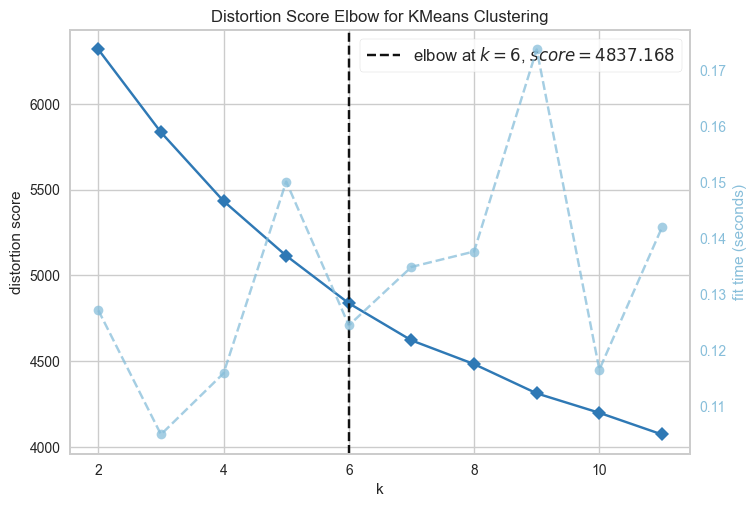

In [1291]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,12))
 
visualizer.fit(df)
visualizer.poof(outpath="../assets/elbow.png")
visualizer.show();

In [1292]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(df, cluster_labels))

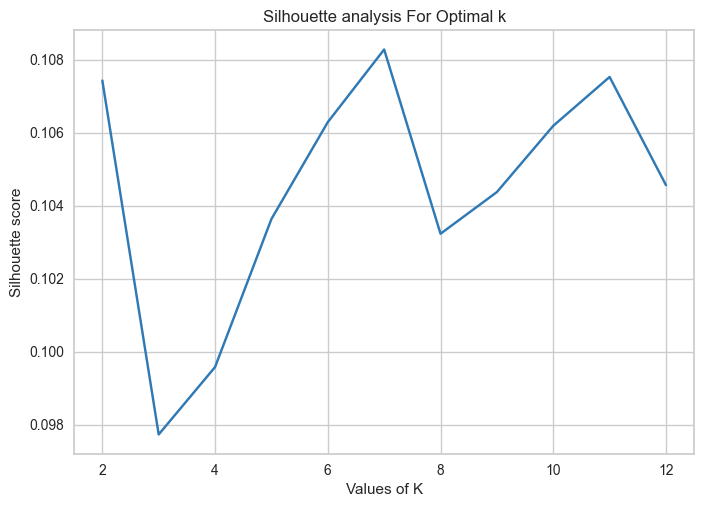

In [1295]:
aa = plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")

plt.savefig("../assets/sil.png", dpi=300, bbox_inches='tight')

plt.show()

In [1481]:
silhouette_avg

[0.09773161947289284,
 0.09957928140846016,
 0.10323146054586492,
 0.10363502395877018,
 0.10437357744445222,
 0.10456400798440874,
 0.10618853978236335,
 0.10628944838303768,
 0.10742883164923353,
 0.10752792442096117,
 0.10828090107440941]

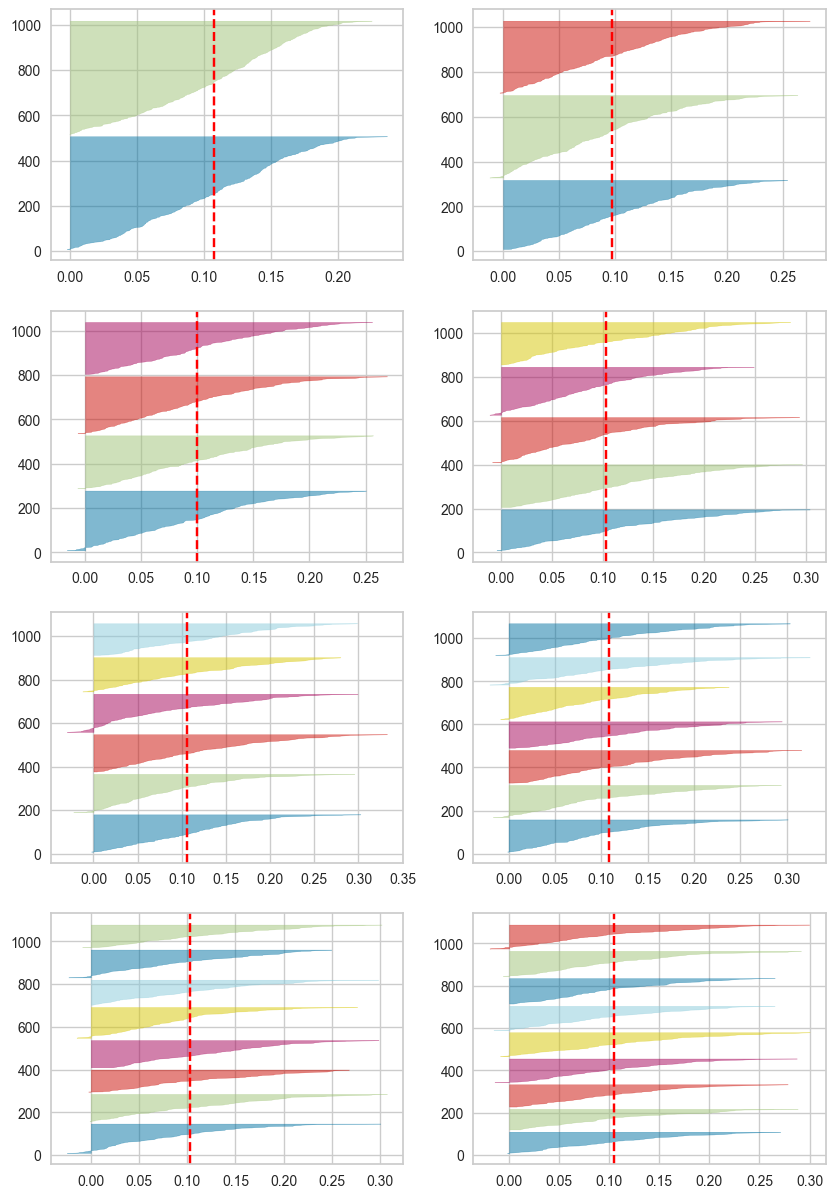

In [1297]:
figa, ax = plt.subplots(4, 2, figsize=(10,15))
for i in [2,3,4,5,6,7,8,9]:
    kmean = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmean, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

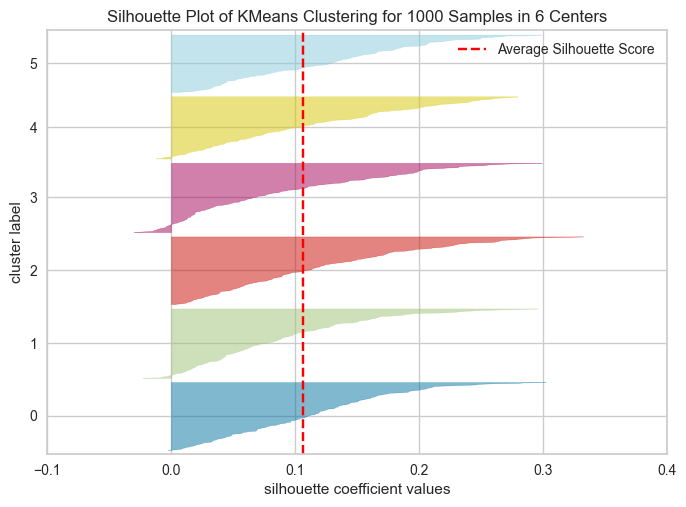

In [1298]:
km = KMeans(n_clusters=6, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df)
visualizer.poof(outpath="../assets/sil_vis.png")
visualizer.show();

In [1301]:
km.fit(df)
cluster_labels = km.labels_

In [1357]:
clusters = pd.DataFrame(cluster_labels,columns=['cluster'])
clusters.head()

,cluster
0,0
1,0
2,4
3,2
4,4


In [1359]:
df_seg = pd.concat([df,clusters], axis=1)
df_seg.head()

,Scaledage,Scaledincome,Scaledspending_score,Scaledpurchase_frequency,Scaledlast_purchase_amount,Scaledmembership_years,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports,cluster
0,-0.384644,0.316868,1.358468,-0.182348,-1.281540,-0.865010,False,False,False,True,False,False,0
1,-1.515362,-0.282016,0.321865,1.082005,-1.523763,-1.215358,False,False,False,False,False,True,0
2,1.078639,1.112778,-0.714738,0.098620,-0.230005,-1.215358,False,False,False,False,False,False,4
3,-0.251618,-1.210096,0.805613,-1.516943,1.690080,1.237080,False,True,False,False,True,False,2
4,1.411203,1.523374,-1.025718,-0.112106,-0.491443,-0.865010,False,False,True,False,False,False,4


### Visulisation Using PCA

In [1311]:
pca = PCA(n_components=3, random_state=42)
pca_components = pca.fit_transform(df_seg.drop('cluster',axis=1))

In [1361]:
df_seg['PCA1'] = pca_components[:,0]
df_seg['PCA2'] = pca_components[:,1]
df_seg['PCA3'] = pca_components[:,2]

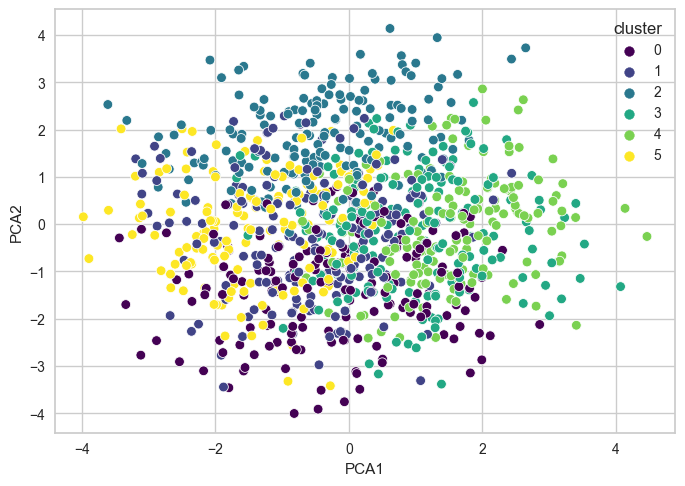

In [1319]:
aa = sns.scatterplot(data=df_seg, x='PCA1', y='PCA2', hue='cluster', palette='viridis');

In [1048]:
aa.figure.savefig("../assets/pca_clusters.png", dpi=300, bbox_inches='tight')

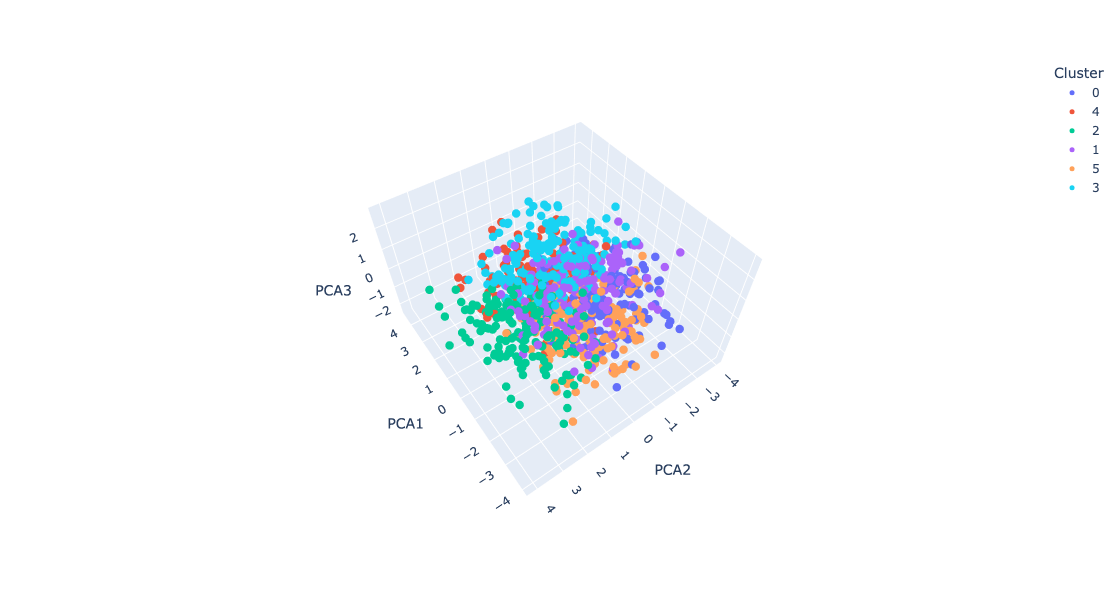

In [1321]:
fig = px.scatter_3d(x=df_seg['PCA1'],y=df_seg['PCA2'],z=df_seg['PCA3'],
                    color=df_seg['cluster'].astype(str),
                    labels={
                        'x':'PCA1',
                        'y':'PCA2',
                        'z':'PCA3'
                    },
                    template='plotly')
fig.update_layout(width=800,
                  height=600,
                  legend_title_text='Cluster')


fig.update_traces(marker=dict(size=5))
fig.show()

In [1323]:
fig.write_html("../assets/interactive_plot.html")

In [1333]:
pca.explained_variance_

array([2.18340771, 2.170095  , 1.02061343])

In [1335]:
explained_variance_ratio = pca.explained_variance_ratio_
for indx, evr in enumerate(explained_variance_ratio):
    print(f"PC{indx+1}: {evr:.2f}")

PC1: 0.23
PC2: 0.23
PC3: 0.11


In [1337]:
pca_results = pd.concat([pd.DataFrame(pca.explained_variance_,columns=['EigenValue']),pd.DataFrame(pca.explained_variance_ratio_,columns=['% of Variance'])],axis=1)
pca_results['% of variance (Cum)'] = pca_results['% of Variance'].cumsum()

In [1339]:
pca_results

,EigenValue,% of Variance,% of variance (Cum)
0,2.183408,0.234999,0.234999
1,2.170095,0.233566,0.468566
2,1.020613,0.109848,0.578414


#### Visualising Using t-SNE

In [1341]:
df_tsne_3d = TSNE(n_components=3, 
                  learning_rate=500, 
                  init='random', 
                  perplexity=200, 
                  n_iter = 5000)
df_tsne_3d = df_tsne_3d.fit_transform(df_seg.drop(['cluster','PCA1','PCA2','PCA3'],axis=1))

In [1342]:
df_tsne_3d = pd.DataFrame(df_tsne_3d, columns=["comp1", "comp2",'comp3'])
df_tsne_3d["cluster"] = clusters
df_tsne_3d.head()

,comp1,comp2,comp3,cluster
0,-227.075455,-48.922398,3.886125,0
1,489.306427,387.257538,52.967216,0
2,-42.089249,-210.622208,-186.122375,4
3,-288.062988,-351.184814,-400.470764,2
4,-72.379707,-188.803513,-274.605408,4


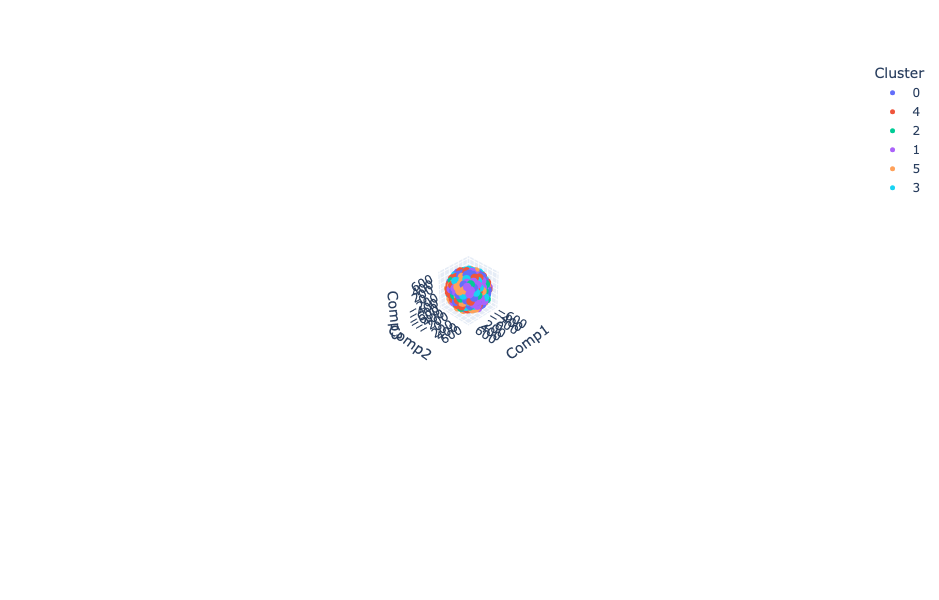

In [1345]:
fig2 = px.scatter_3d(x=df_tsne_3d['comp1'],y=df_tsne_3d['comp2'],z=df_tsne_3d['comp3'],
                    color=df_tsne_3d['cluster'].astype(str),
                    labels={
                        'x':'Comp1',
                        'y':'Comp2',
                        'z':'Comp3'
                    },
                    template='plotly')
fig2.update_layout(width=800,
                  height=600,
                  legend_title_text='Cluster')


fig2.update_traces(marker=dict(size=5))
fig2.show()

In [1347]:
fig.write_html("../assets/interactive_plot_tsne.html")

### Cluster Analysis

In [1365]:
df_analysis = pd.read_csv('../data/customer_segmentation_data.csv')
df_analysis.drop('id',axis=1,inplace=True)
df_analysis = pd.concat([df_analysis,clusters],axis=1)
df_analysis

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,cluster
0,38,Female,99342,90,3,24,Groceries,113.53,0
1,21,Female,78852,60,2,42,Sports,41.93,0
2,60,Female,126573,30,2,28,Clothing,424.36,4
3,40,Other,47099,74,9,5,Home & Garden,991.93,2
4,65,Female,140621,21,3,25,Electronics,347.08,4
...,...,...,...,...,...,...,...,...,...
995,57,Male,112170,57,6,1,Clothing,313.64,4
996,23,Other,65337,76,10,23,Groceries,632.83,5
997,23,Male,113097,40,5,42,Sports,75.09,0
998,22,Female,113695,63,7,44,Electronics,505.16,5


In [1367]:
df_analysis.groupby(['cluster'])['age'].mean()

cluster
0    32.802326
1    46.193182
2    54.069767
3    29.920455
4    56.500000
5    44.643836
Name: age, dtype: float64

In [1369]:
cluster_summary = df_analysis.groupby('cluster').agg({
    'age': ['min','mean','max'],
    'income': ['min','mean','max'],
    'spending_score': ['min','mean','max'],
    'purchase_frequency': ['min','mean','max'],
    'last_purchase_amount': ['min','mean','max']
})

In [1371]:
cluster_summary

age                income                        spending_score  \
        min       mean max    min           mean     max            min   
cluster                                                                   
0        18  32.802326  68  30074   77991.680233  148451             28   
1        19  46.193182  69  30121   68704.107955  143338              1   
2        19  54.069767  69  30004   58867.930233  116123              3   
3        18  29.920455  63  30102   99447.289773  149973              1   
4        33  56.500000  69  49725  122383.170886  149936              3   
5        18  44.643836  69  38683  109792.876712  149723              2   

                        purchase_frequency                 \
              mean  max                min       mean max   
cluster                                                     
0        76.424419  100                  1  26.081395  50   
1        22.982955   75                  1  27.232955  50   
2        60.302326  100                  1  27.313953  50   
3        32.585227   96                  1  23.528409  50   
4        52.765823  100                  1  22.310127  50   
5        61.993151  100                  5  33.924658  50   

        last_purchase_amount                      
                         min        mean     max  
cluster                                           
0                      13.16  234.314360  889.83  
1                      12.45  336.655852  971.09  
2                     197.29  742.928314  998.09  
3                      34.10  630.369489  998.51  
4                      10.40  314.133165  949.32  
5                      83.27  715.297466  999.74

In [1373]:
cluster_distribution = df_analysis['cluster'].value_counts()
print(cluster_distribution)

cluster
1    176
3    176
0    172
2    172
4    158
5    146
Name: count, dtype: int64


In [1375]:
pref_category_summary = df_analysis.groupby(['cluster', 'preferred_category']).size().unstack(fill_value=0)
pref_category_summary

preferred_category,Clothing,Electronics,Groceries,Home & Garden,Sports
cluster,,,,,
0,32,38,32,37,33
1,35,36,34,29,42
2,31,31,34,37,39
3,24,45,32,44,31
4,29,33,30,31,35
5,19,32,37,28,30


In [1377]:
pref_category_proportions = pref_category_summary.div(pref_category_summary.sum(axis=1), axis=0)
pref_category_proportions

preferred_category,Clothing,Electronics,Groceries,Home & Garden,Sports
cluster,,,,,
0,0.186047,0.220930,0.186047,0.215116,0.191860
1,0.198864,0.204545,0.193182,0.164773,0.238636
2,0.180233,0.180233,0.197674,0.215116,0.226744
3,0.136364,0.255682,0.181818,0.250000,0.176136
4,0.183544,0.208861,0.189873,0.196203,0.221519
5,0.130137,0.219178,0.253425,0.191781,0.205479


In [1379]:
gen_category_summary = df_analysis.groupby(['cluster', 'gender']).size().unstack(fill_value=0)
gen_category_summary

gender,Female,Male,Other
cluster,,,
0,75,64,33
1,51,69,56
2,43,53,76
3,49,70,57
4,52,57,49
5,46,44,56


In [1381]:
gen_category_proportions = gen_category_summary.div(gen_category_summary.sum(axis=1), axis=0)
gen_category_proportions

gender,Female,Male,Other
cluster,,,
0,0.436047,0.372093,0.191860
1,0.289773,0.392045,0.318182
2,0.250000,0.308140,0.441860
3,0.278409,0.397727,0.323864
4,0.329114,0.360759,0.310127
5,0.315068,0.301370,0.383562


#### Visualising Cluster Data

In [1383]:
sns.set_style('whitegrid')
sns.set_palette('RdBu_r')
custom_palette = sns.color_palette('RdBu_r', n_colors=10)

In [1471]:
df_group = df_analysis.groupby('cluster').agg(
    {
        'age': 'mean',
        'gender': lambda x: x.value_counts().index[0],
        'income': 'mean',
        'spending_score': 'mean',
        'membership_years': 'mean',
        'purchase_frequency':'mean',
        'preferred_category': lambda x: ', '.join(x.value_counts().index[[0,1,2]]),
        'last_purchase_amount': 'mean',
        
    }
)
df_group

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
cluster,,,,,,,,
0,32.802326,Female,77991.680233,76.424419,5.767442,26.081395,"Electronics, Home & Garden, Sports",234.314360
1,46.193182,Male,68704.107955,22.982955,7.494318,27.232955,"Sports, Electronics, Clothing",336.655852
2,54.069767,Other,58867.930233,60.302326,4.127907,27.313953,"Sports, Home & Garden, Groceries",742.928314
3,29.920455,Male,99447.289773,32.585227,3.397727,23.528409,"Electronics, Home & Garden, Groceries",630.369489
4,56.500000,Male,122383.170886,52.765823,3.867089,22.310127,"Sports, Electronics, Home & Garden",314.133165
5,44.643836,Other,109792.876712,61.993151,8.486301,33.924658,"Groceries, Electronics, Sports",715.297466


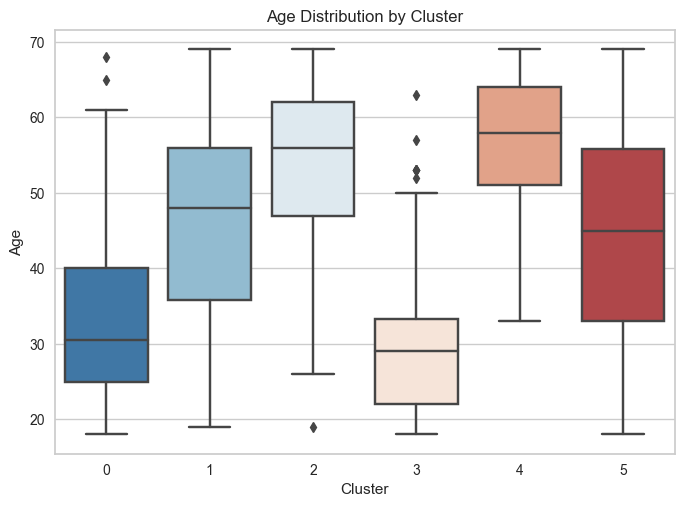

In [1387]:
a = sns.boxplot(data=df_analysis, x='cluster', y='age')
a.set(xlabel='Cluster', ylabel='Age', title='Age Distribution by Cluster');

In [962]:
a.figure.savefig("../assets/age_dist.png", dpi=300, bbox_inches='tight')

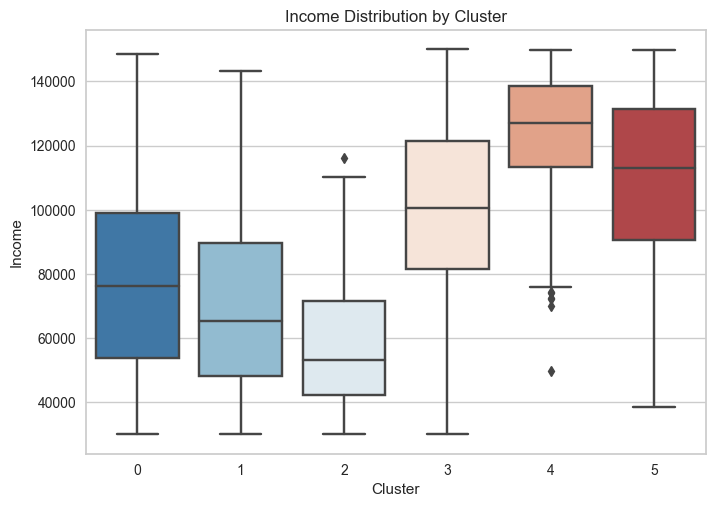

In [1389]:
b = sns.boxplot(data=df_analysis, x='cluster', y='income')
b.set(xlabel='Cluster', ylabel='Income', title='Income Distribution by Cluster');

In [966]:
b.figure.savefig("../assets/income_dist.png", dpi=300, bbox_inches='tight')

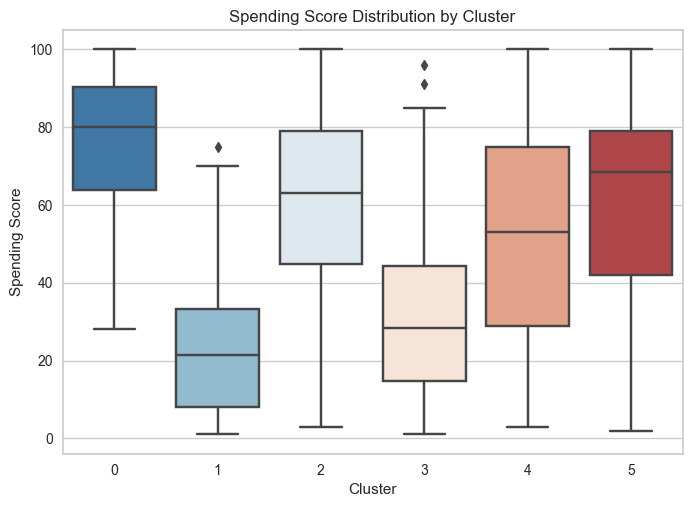

In [1391]:
c = sns.boxplot(data=df_analysis, x='cluster', y='spending_score')
c.set(xlabel='Cluster', ylabel='Spending Score', title='Spending Score Distribution by Cluster');

In [970]:
c.figure.savefig("../assets/spend_score_dist.png", dpi=300, bbox_inches='tight')

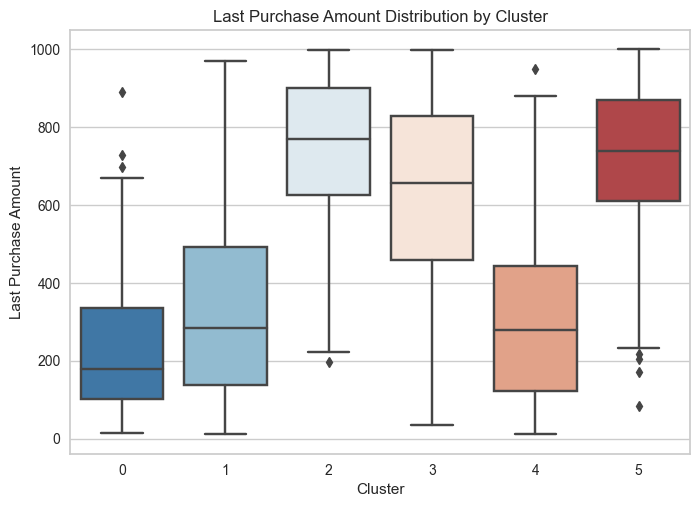

In [1393]:
d = sns.boxplot(data=df_analysis, x='cluster', y='last_purchase_amount')
d.set(ylabel='Last Purchase Amount', xlabel='Cluster', title='Last Purchase Amount Distribution by Cluster');

In [1062]:
d.figure.savefig("../assets/last_pur_amnt.png", dpi=300, bbox_inches='tight')

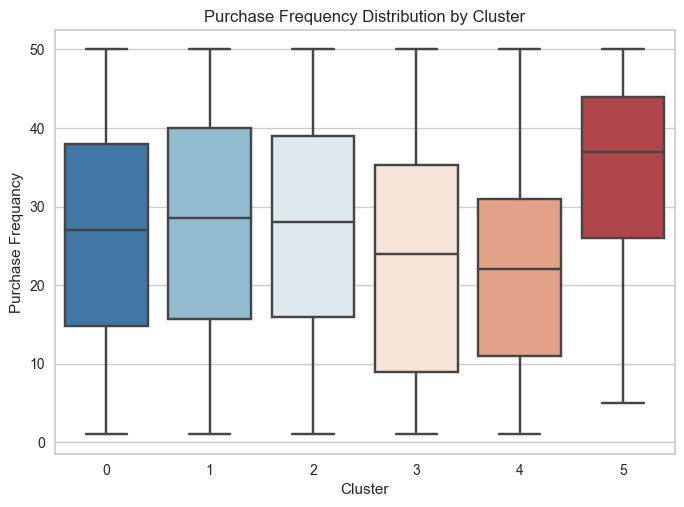

In [1395]:
e = sns.boxplot(data=df_analysis, x='cluster', y='purchase_frequency')
e.set(xlabel='Cluster', ylabel='Purchase Frequancy', title='Purchase Frequency Distribution by Cluster');

In [978]:
e.figure.savefig("../assets/p_freq.png", dpi=300, bbox_inches='tight')

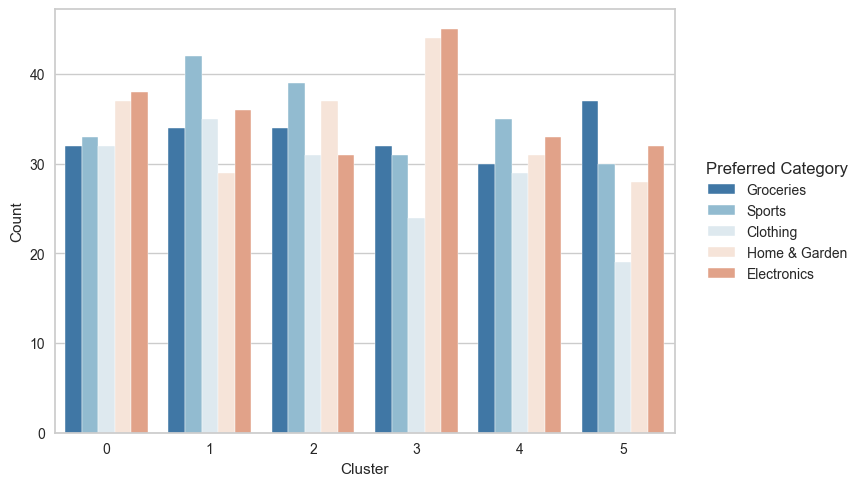

In [1397]:
f = sns.countplot(data=df_analysis, hue='preferred_category', x='cluster')
f.set(xlabel = 'Cluster', ylabel='Count')
f.legend(title='Preferred Category', loc='center right', bbox_to_anchor=(1.3, 0.5));

In [982]:
f.figure.savefig("../assets/pref_cat.png", dpi=300, bbox_inches='tight')

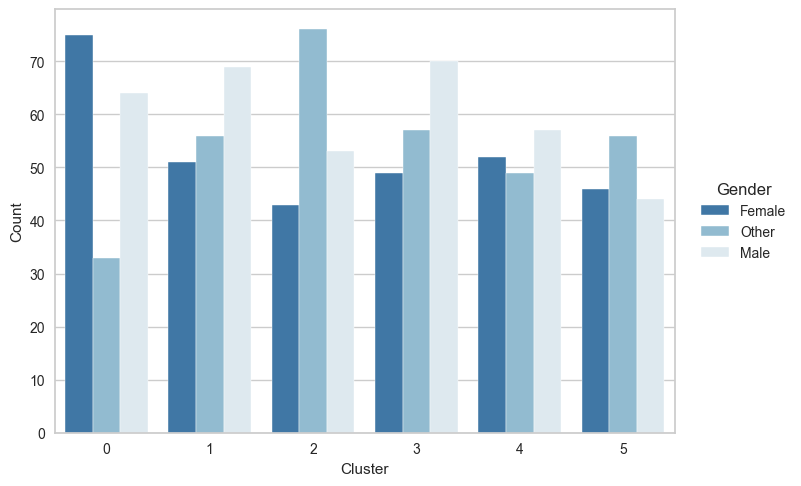

In [1399]:
g = sns.countplot(data=df_analysis, hue='gender', x='cluster')
g.set(xlabel = 'Cluster', ylabel='Count')
g.legend(title='Gender', loc='center right', bbox_to_anchor=(1.2, 0.5));

In [986]:
g.figure.savefig("../assets/gender.png", dpi=300, bbox_inches='tight')

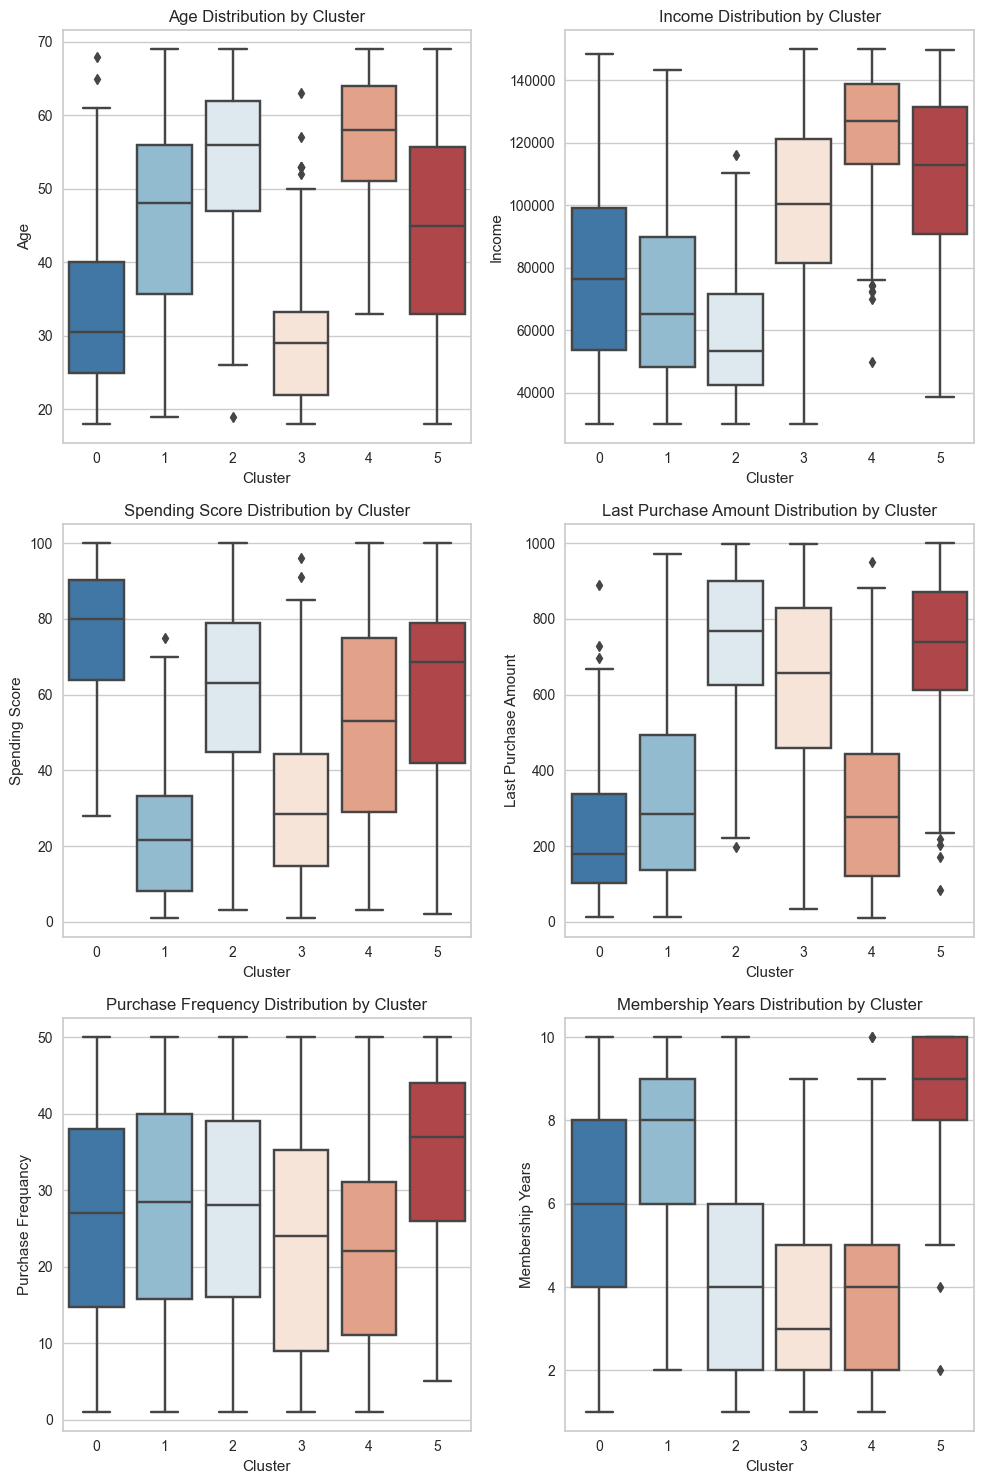

In [1486]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.flatten() 

a = sns.boxplot(data=df_analysis, x='cluster', y='age', ax=axes[0])
a.set(xlabel='Cluster', ylabel='Age', title='Age Distribution by Cluster')
b = sns.boxplot(data=df_analysis, x='cluster', y='income', ax=axes[1])
b.set(xlabel='Cluster', ylabel='Income', title='Income Distribution by Cluster')
c = sns.boxplot(data=df_analysis, x='cluster', y='spending_score', ax=axes[2])
c.set(xlabel='Cluster', ylabel='Spending Score', title='Spending Score Distribution by Cluster')
d = sns.boxplot(data=df_analysis, x='cluster', y='last_purchase_amount', ax=axes[3])
d.set(ylabel='Last Purchase Amount', xlabel='Cluster', title='Last Purchase Amount Distribution by Cluster')
e = sns.boxplot(data=df_analysis, x='cluster', y='purchase_frequency', ax=axes[4])
e.set(xlabel='Cluster', ylabel='Purchase Frequancy', title='Purchase Frequency Distribution by Cluster')
f = sns.boxplot(data=df_analysis, x='cluster', y='membership_years', ax=axes[5])
f.set(xlabel='Cluster', ylabel='Membership Years', title='Membership Years Distribution by Cluster')

plt.tight_layout()
plt.show()

In [1488]:
fig.savefig("../assets/cluster_cont.png", dpi=300, bbox_inches='tight')

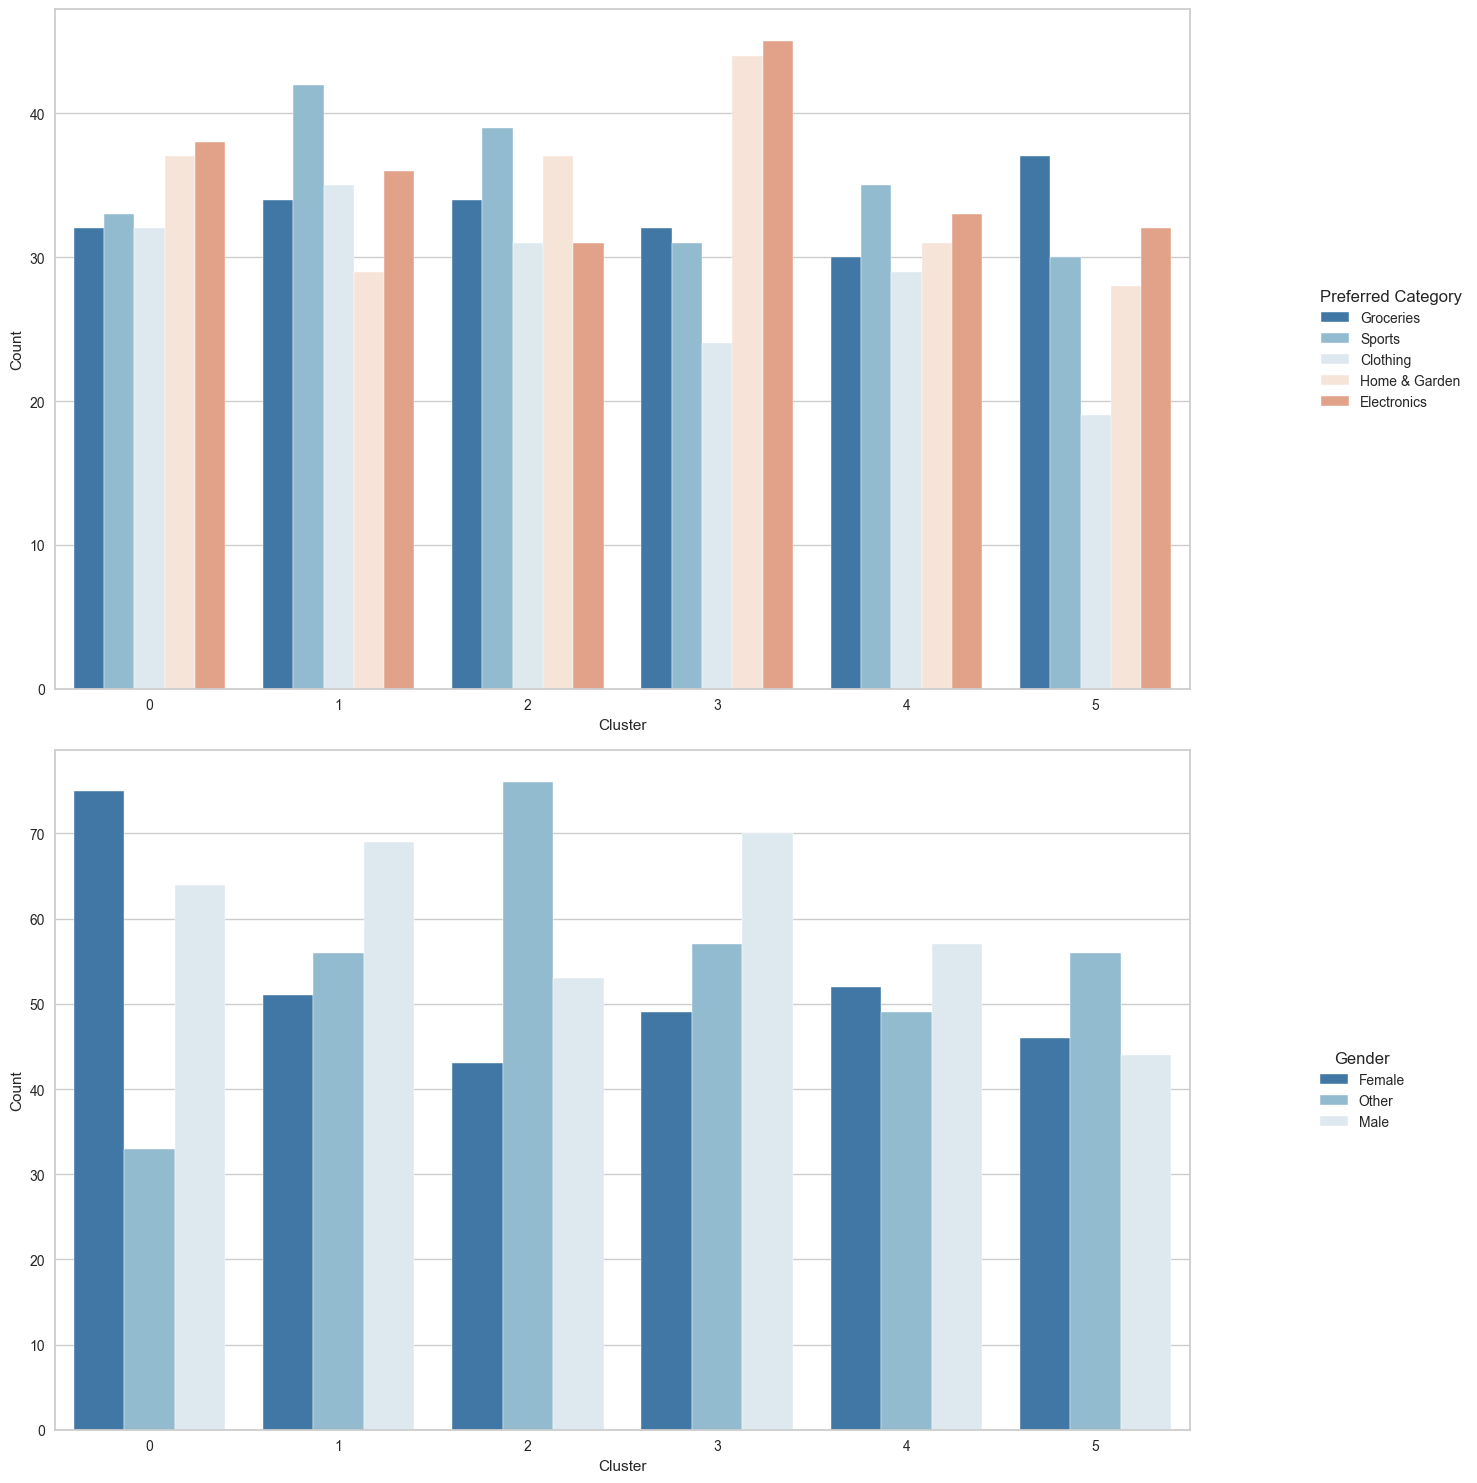

In [1499]:
fig1, axes1 = plt.subplots(2, 1, figsize=(15, 15))
axes1 = axes1.flatten() 

f = sns.countplot(data=df_analysis, hue='preferred_category', x='cluster', ax=axes1[0])
f.set(xlabel = 'Cluster', ylabel='Count')
f.legend(title='Preferred Category', loc='center right', bbox_to_anchor=(1.25, 0.5))
g = sns.countplot(data=df_analysis, hue='gender', x='cluster', ax=axes1[1])
g.set(xlabel = 'Cluster', ylabel='Count')
g.legend(title='Gender', loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()
plt.show()

In [1501]:
fig1.savefig('../assets/cluster_cat_breakdown.png', dpi=300, bbox_inches='tight')

### Brief Clustering Analysis Without Categorical Variables

In [1405]:
df2 = pd.read_csv('../assets/cleaned_data.csv')

In [1407]:
df2.head()

,Scaledage,Scaledincome,Scaledspending_score,Scaledpurchase_frequency,Scaledlast_purchase_amount,Scaledmembership_years,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,-0.384644,0.316868,1.358468,-0.182348,-1.281540,-0.865010,False,False,False,True,False,False
1,-1.515362,-0.282016,0.321865,1.082005,-1.523763,-1.215358,False,False,False,False,False,True
2,1.078639,1.112778,-0.714738,0.098620,-0.230005,-1.215358,False,False,False,False,False,False
3,-0.251618,-1.210096,0.805613,-1.516943,1.690080,1.237080,False,True,False,False,True,False
4,1.411203,1.523374,-1.025718,-0.112106,-0.491443,-0.865010,False,False,True,False,False,False


In [1409]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Scaledage                         1000 non-null   float64
 1   Scaledincome                      1000 non-null   float64
 2   Scaledspending_score              1000 non-null   float64
 3   Scaledpurchase_frequency          1000 non-null   float64
 4   Scaledlast_purchase_amount        1000 non-null   float64
 5   Scaledmembership_years            1000 non-null   float64
 6   gender_Male                       1000 non-null   bool   
 7   gender_Other                      1000 non-null   bool   
 8   preferred_category_Electronics    1000 non-null   bool   
 9   preferred_category_Groceries      1000 non-null   bool   
 10  preferred_category_Home & Garden  1000 non-null   bool   
 11  preferred_category_Sports         1000 non-null   bool   
dtypes: bool

In [1411]:
df2.drop(columns=df2.select_dtypes(include='bool').columns, axis=1, inplace=True)

In [1413]:
df2.head()

,Scaledage,Scaledincome,Scaledspending_score,Scaledpurchase_frequency,Scaledlast_purchase_amount,Scaledmembership_years
0,-0.384644,0.316868,1.358468,-0.182348,-1.281540,-0.865010
1,-1.515362,-0.282016,0.321865,1.082005,-1.523763,-1.215358
2,1.078639,1.112778,-0.714738,0.098620,-0.230005,-1.215358
3,-0.251618,-1.210096,0.805613,-1.516943,1.690080,1.237080
4,1.411203,1.523374,-1.025718,-0.112106,-0.491443,-0.865010


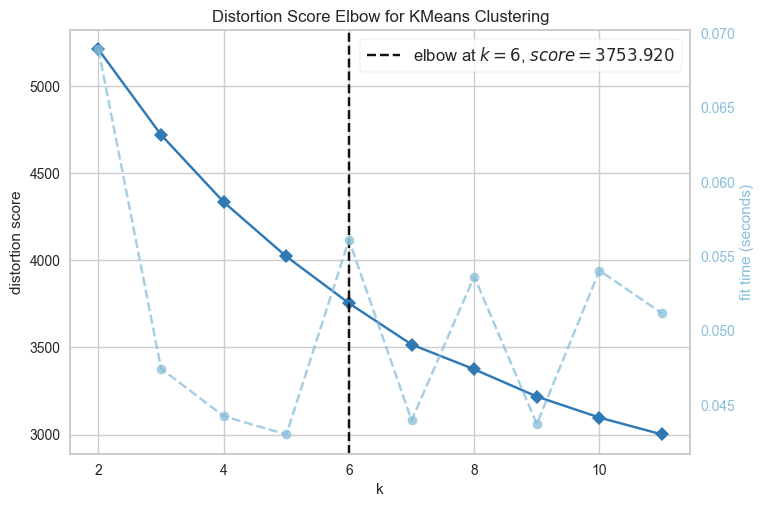

In [1415]:
km2 = KMeans(random_state=42)
visualizer2 = KElbowVisualizer(km2, k=(2,12))
 
visualizer2.fit(df2)
visualizer2.show();

In [1417]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
silhouette_avg2 = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans2 = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans2.fit(df2)
    cluster_labels2 = kmeans2.labels_

    # silhouette score
    silhouette_avg2.append(silhouette_score(df2, cluster_labels2))

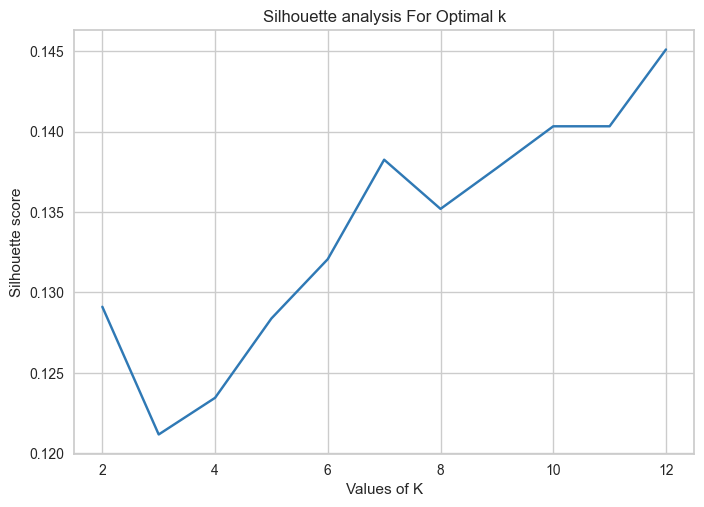

In [1419]:
plt.plot(range_n_clusters, silhouette_avg2)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")

plt.show()

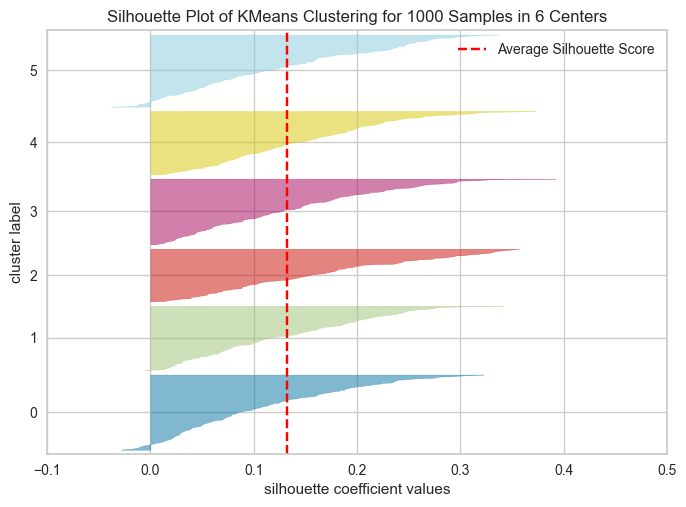

In [1421]:
km2 = KMeans(n_clusters=6, random_state=42)
visualizer2 = SilhouetteVisualizer(km2, colors='yellowbrick')
visualizer2.fit(df2)
visualizer2.show();

In [1423]:
km2.fit(df2)
cluster_labels2 = km2.labels_

In [1425]:
clusters2 = pd.DataFrame(cluster_labels2,columns=['cluster'])
clusters2.head()

,cluster
0,1
1,1
2,4
3,5
4,4


In [1427]:
df2_seg = pd.concat([df2,clusters2], axis=1)
df2_seg.head()

,Scaledage,Scaledincome,Scaledspending_score,Scaledpurchase_frequency,Scaledlast_purchase_amount,Scaledmembership_years,cluster
0,-0.384644,0.316868,1.358468,-0.182348,-1.281540,-0.865010,1
1,-1.515362,-0.282016,0.321865,1.082005,-1.523763,-1.215358,1
2,1.078639,1.112778,-0.714738,0.098620,-0.230005,-1.215358,4
3,-0.251618,-1.210096,0.805613,-1.516943,1.690080,1.237080,5
4,1.411203,1.523374,-1.025718,-0.112106,-0.491443,-0.865010,4


In [1431]:
pca2 = PCA(n_components=3, random_state=42)
pca_components2 = pca2.fit_transform(df2_seg.drop('cluster',axis=1))

In [1433]:
df2_seg['PCA1'] = pca_components2[:,0]
df2_seg['PCA2'] = pca_components2[:,1]
df2_seg['PCA3'] = pca_components2[:,2]

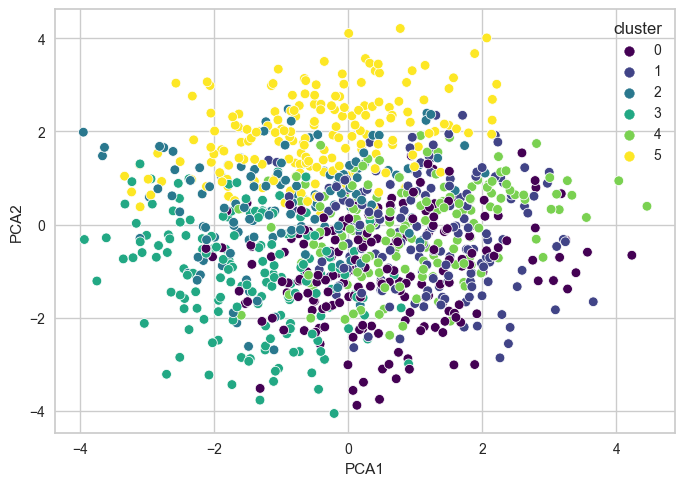

In [1435]:
sns.scatterplot(data=df2_seg, x='PCA1', y='PCA2', hue='cluster', palette='viridis');

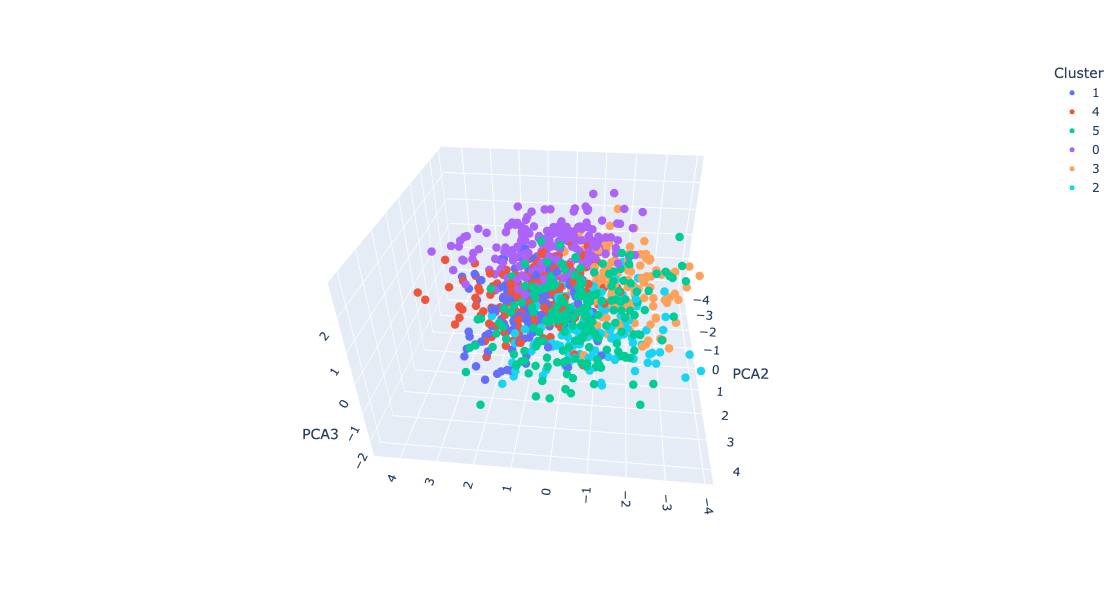

In [1437]:
fig2 = px.scatter_3d(x=df2_seg['PCA1'],y=df2_seg['PCA2'],z=df2_seg['PCA3'],
                    color=df2_seg['cluster'].astype(str),
                    labels={
                        'x':'PCA1',
                        'y':'PCA2',
                        'z':'PCA3'
                    },
                    template='plotly')
fig2.update_layout(width=800,
                  height=600,
                  legend_title_text='Cluster')


fig2.update_traces(marker=dict(size=5))
fig2.show()

In [1439]:
explained_variance_ratio2 = pca2.explained_variance_ratio_
for indx, evr in enumerate(explained_variance_ratio2):
    print(f"PC{indx+1}: {evr:.2f}")

PC1: 0.27
PC2: 0.26
PC3: 0.12


In [1441]:
pca_results2 = pd.concat([pd.DataFrame(pca2.explained_variance_,columns=['EigenValue']),pd.DataFrame(pca2.explained_variance_ratio_,columns=['% of Variance'])],axis=1)
pca_results2['% of variance (Cum)'] = pca_results2['% of Variance'].cumsum()

In [1443]:
pca_results2

,EigenValue,% of Variance,% of variance (Cum)
0,2.180948,0.266687,0.266687
1,2.162890,0.264479,0.531166
2,1.017589,0.124431,0.655597


In [1457]:
df_analysis2 = pd.read_csv('../data/customer_segmentation_data.csv')
df_analysis2.drop('id',axis=1,inplace=True)
#df_analysis2.drop(columns=df_analysis2.select_dtypes(include='object').columns, axis=1, inplace=True)
df_analysis2 = pd.concat([df_analysis2,clusters2],axis=1)
df_analysis2

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,cluster
0,38,Female,99342,90,3,24,Groceries,113.53,1
1,21,Female,78852,60,2,42,Sports,41.93,1
2,60,Female,126573,30,2,28,Clothing,424.36,4
3,40,Other,47099,74,9,5,Home & Garden,991.93,5
4,65,Female,140621,21,3,25,Electronics,347.08,4
...,...,...,...,...,...,...,...,...,...
995,57,Male,112170,57,6,1,Clothing,313.64,4
996,23,Other,65337,76,10,23,Groceries,632.83,3
997,23,Male,113097,40,5,42,Sports,75.09,0
998,22,Female,113695,63,7,44,Electronics,505.16,0


In [1461]:
df_group2 = df_analysis2.groupby('cluster').mean(numeric_only=True)
df_group2

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
cluster,,,,,,
0,28.565445,104661.931937,25.842932,5.073298,29.675393,479.042408
1,38.975610,94413.524390,78.500000,2.817073,20.908537,393.342256
2,53.552239,116935.746269,68.044776,7.380597,30.656716,738.136045
3,37.353293,64228.311377,70.305389,7.778443,33.395210,374.364790
4,55.192547,96338.832298,31.422360,5.850932,19.639752,210.076273
5,52.650273,60767.666667,38.016393,4.415301,25.420765,770.994590


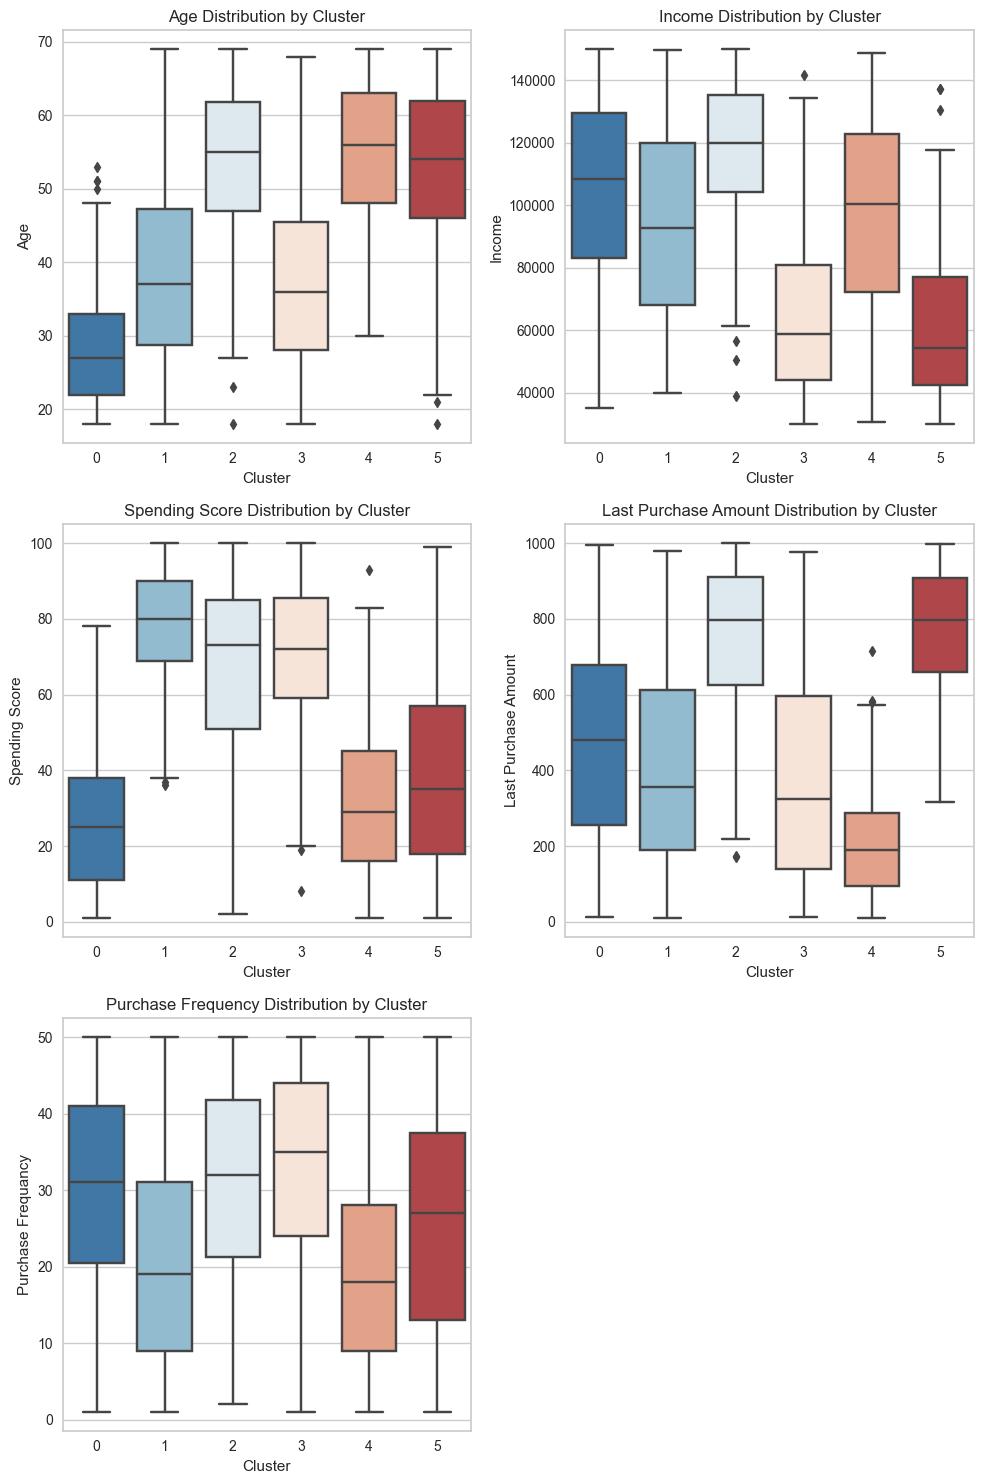

In [1463]:
fig2a, axes2 = plt.subplots(3, 2, figsize=(10, 15))
axes2 = axes2.flatten() 

a = sns.boxplot(data=df_analysis2, x='cluster', y='age', ax=axes2[0])
a.set(xlabel='Cluster', ylabel='Age', title='Age Distribution by Cluster')
b = sns.boxplot(data=df_analysis2, x='cluster', y='income', ax=axes2[1])
b.set(xlabel='Cluster', ylabel='Income', title='Income Distribution by Cluster')
c = sns.boxplot(data=df_analysis2, x='cluster', y='spending_score', ax=axes2[2])
c.set(xlabel='Cluster', ylabel='Spending Score', title='Spending Score Distribution by Cluster')
d = sns.boxplot(data=df_analysis2, x='cluster', y='last_purchase_amount', ax=axes2[3])
d.set(ylabel='Last Purchase Amount', xlabel='Cluster', title='Last Purchase Amount Distribution by Cluster')
e = sns.boxplot(data=df_analysis2, x='cluster', y='purchase_frequency', ax=axes2[4])
e.set(xlabel='Cluster', ylabel='Purchase Frequancy', title='Purchase Frequency Distribution by Cluster')

fig2a.delaxes(axes2[5])
plt.tight_layout()
plt.show()

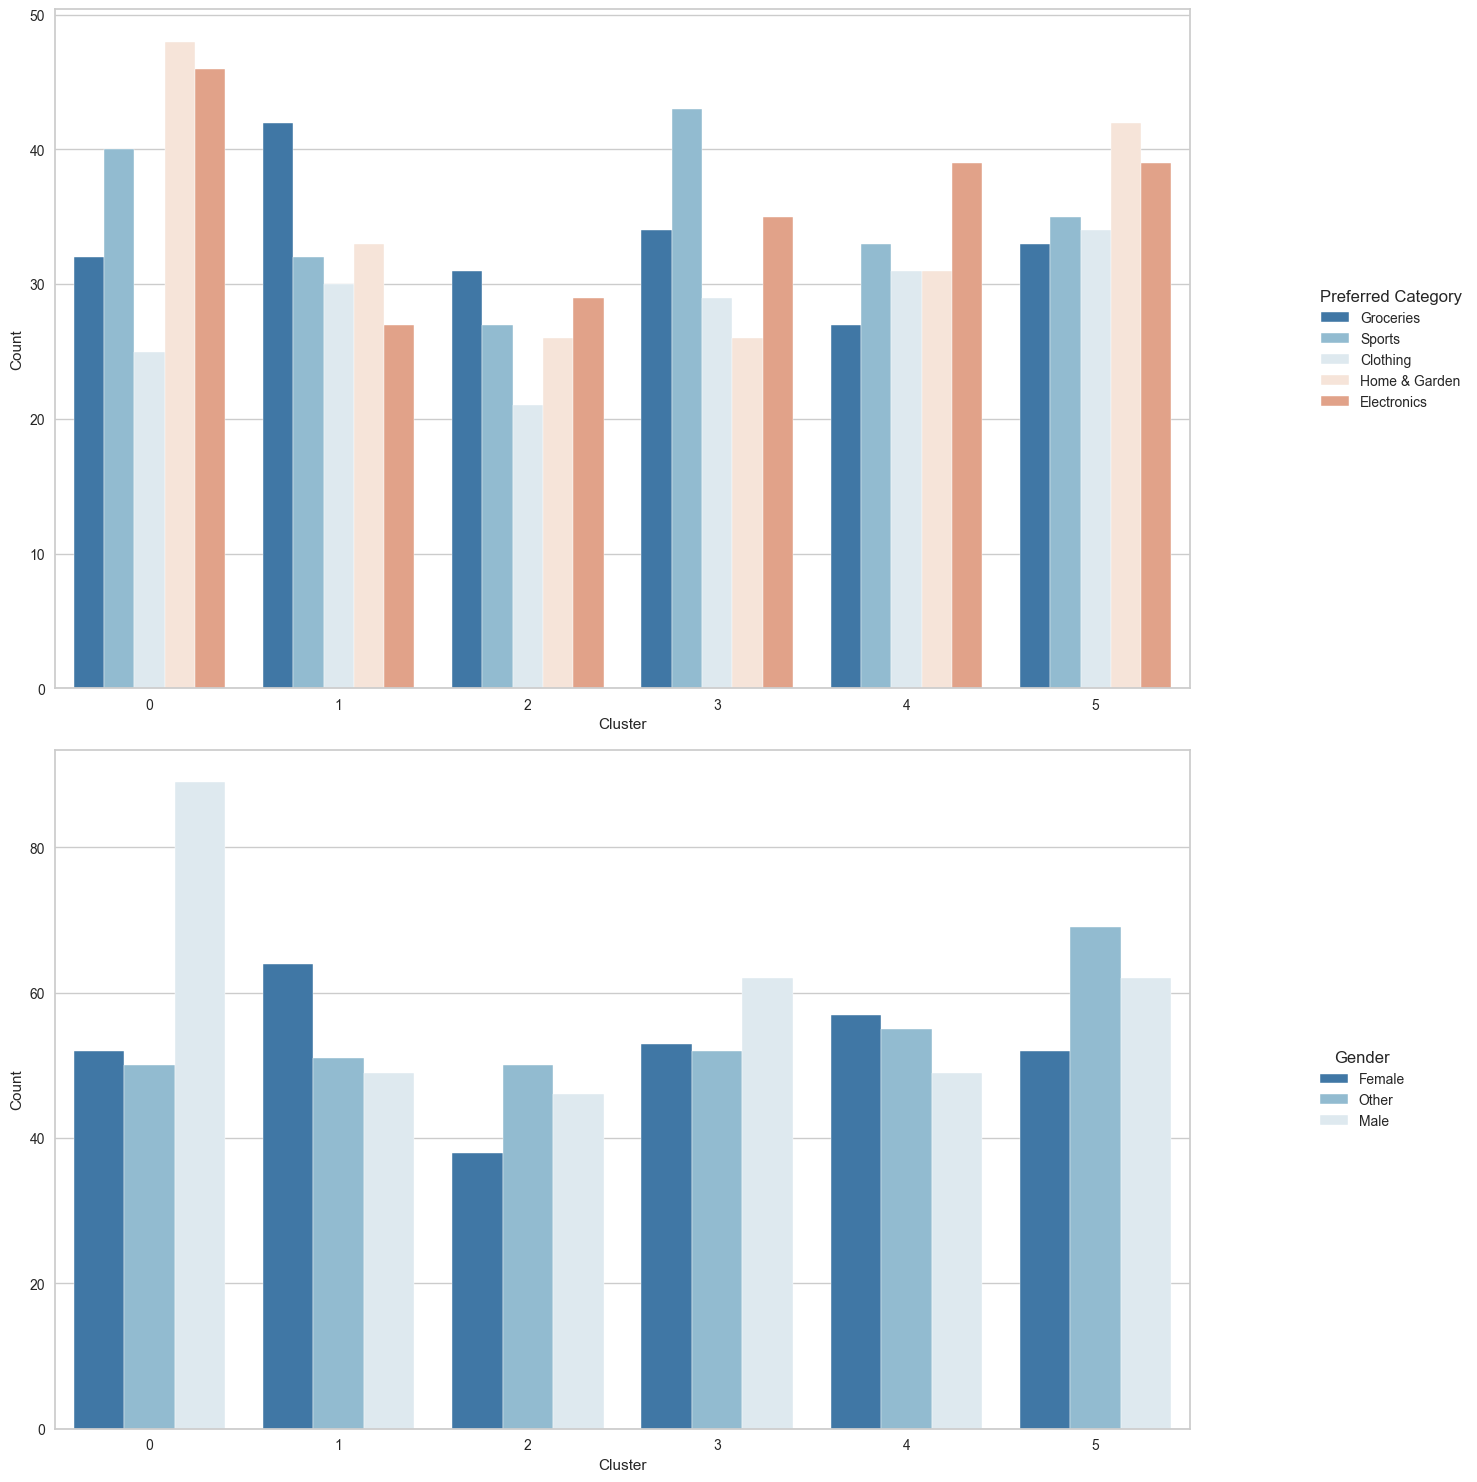

In [1495]:
fig2b, axes2b = plt.subplots(2, 1, figsize=(15, 15))
axes2b = axes2b.flatten() 

f = sns.countplot(data=df_analysis2, hue='preferred_category', x='cluster', ax=axes2b[0])
f.set(xlabel = 'Cluster', ylabel='Count')
f.legend(title='Preferred Category', loc='center right', bbox_to_anchor=(1.25, 0.5))
g = sns.countplot(data=df_analysis2, hue='gender', x='cluster', ax=axes2b[1])
g.set(xlabel = 'Cluster', ylabel='Count')
g.legend(title='Gender', loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()
plt.show()